In [9]:
import re
import pandas as pd
import nltk

# Data

In [10]:
df = pd.read_csv("../datasets/politics-20k-comments.csv")
df.head()

,created_utc,ups,subreddit_id,link_id,name,score_hidden,author_flair_css_class,author_flair_text,subreddit,id,...,downs,archived,author,score,retrieved_on,body,distinguished,edited,controversiality,parent_id
0,1430438400,0.0,t5_2cneq,t3_34f7mc,t1_cqug90i,0.0,NaN,NaN,politics,cqug90i,...,0.0,0.0,Wicked_Truth,0.0,1.432703e+09,Are you really implying we return to those tim...,NaN,0.0,0.0,t1_cqufim0
1,1430438406,-1.0,t5_2cneq,t3_34fn91,t1_cqug95d,0.0,NaN,NaN,politics,cqug95d,...,0.0,0.0,OceanGroovedropper,-1.0,1.432703e+09,"Seems morally questionable to me, but if that'...",NaN,0.0,0.0,t1_cqufu3n
2,1430438424,1.0,t5_2cneq,t3_34ebvj,t1_cqug9j2,0.0,NaN,NaN,politics,cqug9j2,...,0.0,0.0,Drooperdoo,1.0,1.432703e+09,"Ah, Ninjew, we feel the same.\n\nWait! Nin*jew...",NaN,0.0,0.0,t1_cqug1n2
3,1430438433,1.0,t5_2cneq,t3_34a6iq,t1_cqug9p6,0.0,NaN,NaN,politics,cqug9p6,...,0.0,0.0,PabloNueve,1.0,1.432703e+09,I mean I suppose we'll find out. I just have n...,NaN,0.0,0.0,t1_cqtsyye
4,1430438450,2.0,t5_2cneq,t3_34e3wn,t1_cquga2u,0.0,NaN,NaN,politics,cquga2u,...,0.0,0.0,whosename,2.0,1.432703e+09,Nor should you be able to. \nWould you like...,NaN,0.0,0.0,t1_cqu59v3


In [12]:
all_comments = df['body']
all_comments.describe()

count         20000
unique        18694
top       [deleted]
freq           1148
Name: body, dtype: object

In [13]:
# deleted comments Series
deleted_comments = all_comments[all_comments == "[deleted]"]
deleted_comments.describe()

count          1148
unique            1
top       [deleted]
freq           1148
Name: body, dtype: object

In [14]:
# valid comments!
comments = all_comments.drop(deleted_comments.index)
comments = comments.to_frame().reset_index(drop=True).astype('str')
comments.head()

,body
0,Are you really implying we return to those tim...
1,"Seems morally questionable to me, but if that'..."
2,"Ah, Ninjew, we feel the same.\n\nWait! Nin*jew..."
3,I mean I suppose we'll find out. I just have n...
4,Nor should you be able to. \nWould you like...


In [15]:
# clean out any urls and and brackets, parenthesis and hyphens, leaving only alphanumeric words
url_regex = r"([--:\w?@%&+~#=]*\.[a-z]{2,4}\/{0,2})((?:[?&](?:\w+)=(?:\w+))+|[--:\w?@%&+~#=]+)?"
special_character_regex = r"[\"'()[\]]"

#remove urls, special characters, and replace hyphens with a space
comments['clean'] = comments['body'].apply(lambda text: text.strip().lower()).apply(lambda text: re.sub(url_regex, '', text)).apply(lambda text: re.sub(special_character_regex, '', text)).apply(lambda text: re.sub(r"-", ' ', text))
comments['clean'].head()

0    are you really implying we return to those tim...
1    seems morally questionable to me, but if thats...
2    ah, ninjew, we feel the same.\n\nwait! nin*jew...
3    i mean i suppose well find out. i just have ne...
4    nor should you be able to.    \nwould you like...
Name: clean, dtype: object

In [17]:
comments

,body,clean,tokens
0,Are you really implying we return to those tim...,are you really implying we return to those tim...,"[are, you, really, implying, we, return, to, t..."
1,"Seems morally questionable to me, but if that'...","seems morally questionable to me, but if thats...","[seems, morally, questionable, to, me, but, if..."
2,"Ah, Ninjew, we feel the same.\n\nWait! Nin*jew...","ah, ninjew, we feel the same.\n\nwait! nin*jew...","[ah, ninjew, we, feel, the, same, wait, nin, *..."
3,I mean I suppose we'll find out. I just have n...,i mean i suppose well find out. i just have ne...,"[i, mean, i, suppose, well, find, out, i, just..."
4,Nor should you be able to. \nWould you like...,nor should you be able to. \nwould you like...,"[nor, should, you, be, able, to, would, you, l..."
...,...,...,...
18852,"Just fucking lie to them, then do what's right...","just fucking lie to them, then do whats right ...","[just, fucking, lie, to, them, then, do, whats..."
18853,"Yeah, there's a bunch of factors that are impo...","yeah, theres a bunch of factors that are impor...","[yeah, theres, a, bunch, of, factors, that, ar..."
18854,Money..... there is nothing conservatives will...,money..... there is nothing conservatives will...,"[money, there, is, nothing, conservatives, wil..."
18855,Maybe because she is the first woman in over 2...,maybe because she is the first woman in over 2...,"[maybe, because, she, is, the, first, woman, i..."


In [18]:
all_words = [token for sentence in comments['tokens'] for token in sentence]

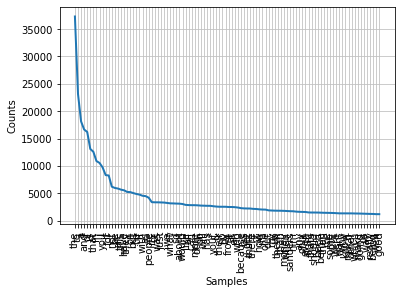

(<AxesSubplot:xlabel='Samples', ylabel='Counts'>,
 [('the', 37299),
  ('to', 23155),
  ('a', 18133),
  ('and', 16646),
  ('of', 16198),
  ('is', 13098),
  ('that', 12576),
  ('in', 10884),
  ('i', 10543),
  ('you', 9733),
  ('it', 8318),
  ('for', 8247),
  ('not', 6201),
  ('be', 5969),
  ('are', 5858),
  ('this', 5660),
  ('have', 5536),
  ('they', 5240),
  ('on', 5211),
  ('but', 5032),
  ('he', 4868),
  ('if', 4754),
  ('with', 4540),
  ('as', 4475),
  ('people', 4188),
  ('its', 3373),
  ('or', 3348),
  ('was', 3345),
  ('just', 3324),
  (';', 3300),
  ('we', 3231),
  ('what', 3157),
  ('/', 3144),
  ('so', 3115),
  ('about', 3101),
  ('would', 3035),
  ('like', 2877),
  ('all', 2839),
  ('can', 2823),
  ('more', 2820),
  ('dont', 2792),
  ('do', 2745),
  ('will', 2727),
  ('has', 2708),
  ('*', 2704),
  ('your', 2631),
  ('&', 2571),
  ('their', 2536),
  ('no', 2534),
  ('by', 2532)])

In [21]:
freqdist = nltk.FreqDist(all_words)
freqdist.plot(100), freqdist.most_common(50)

> We can see that our corpus follows zipfs law, and that when plotting the top 100 words, we have a little ledge between 10,000 occurances and 5,000 occurances, and this is where pronouns such as i and you live:

In [24]:
print("Total words: ", sum(freqdist.values()))
print("Unique words: ", len(freqdist))
print("Words that only occur once: ", len([word for word in all_words if freqdist[word] == 1]))

Total words:  808567
Unique words:  22977
Words that only occur once:  8818


> Nearly 80k words in our dataset, with 22k being unique words and 8k only occuring once. That means 72k occur multiple times.

In [25]:
avg_len_chars = 0
for comment in comments['clean']:
    avg_len_chars += len(comment)
avg_len_chars /= len(comments)

avg_len_words = 0
for comment in comments['tokens']:
    avg_len_words += len(comment)
avg_len_words /= len(comments)

In [26]:
print("Avg length of sentence (characters): ", avg_len_chars)
print("Avg length of sentence (words): ", avg_len_words)
print("Avg length of word: ", avg_len_chars/avg_len_words)

Avg length of sentence (characters):  238.0345760195153
Avg length of sentence (words):  42.8788778702869
Avg length of word:  5.551324751071958


> We can see that the average length of a sentence is 42.8 words, or 238 characters. This means that the average word length is 5.5 characters. You can image that this is true because most of the words in the top 20 most frequent words in our list are short, around 1-4 characters in length.

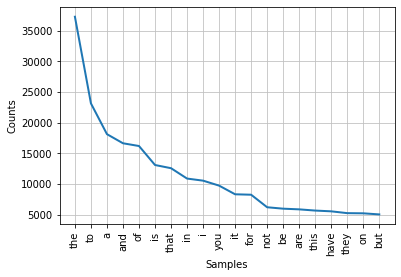

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
freqdist.plot(20)